## Load data with text descriptions & image urls

In [1]:
import pandas as pd
from pathlib import Path

DATA_PATH = 'data'

file_name = (
    Path('tables_OZ_geo_5500') / 'source' /
    'Ozon_Crawler_Latest_info2025-04-07-12-57-51.xlsx'
)

descriptions_images_df = pd.read_excel(Path(DATA_PATH) / file_name)
descriptions_images_df.columns.tolist()

['Sku (Sku)',
 'Фото (CoverImage)',
 'Название товара (ProductName)',
 'Продавец (SellerName)',
 'Бренд (BrandName)',
 'Название категории (CategoryName)',
 'Цена соинвест (DiscountPrice)',
 'Цена по карте (OzonCardPrice)',
 'Сток FBO (StockFbm)',
 'Сток FBS (StockFbs)',
 'Ошибка загрузки (CrawlerError)',
 'Валюта (Currency)',
 'Цена до скидки (BasePrice)',
 'Рейтинг товара (AvgRating)',
 'Количество отзывов (Reviews)',
 'Описание (Description)',
 'Rich-контент (RichContent)',
 'Ссылка на карточку',
 'SellerProductId (SellerProductId)']

In [2]:
# rename columns

column_mapping = {
        'Sku (Sku)': 'sku',
        'Описание (Description)': 'description',
        'Фото (CoverImage)': 'image_url',
    }

descriptions_images_df = descriptions_images_df.rename(columns=column_mapping)
descriptions_images_df = descriptions_images_df[[
    'sku', 'description', 'image_url'
]] # take subset

## Load data with economic features

In [3]:
import pandas as pd
from pathlib import Path

file_path = (
    Path(DATA_PATH) / 'tables_OZ_geo_5500' /
    'source' / 'Карты мира_озон.xlsx'
)

economic_df = pd.read_excel(file_path)
economic_df.columns.tolist()

['SKU',
 'Name',
 'Category',
 'Схема',
 'Brand',
 'Niche',
 'Seller',
 'Balance',
 'Balance FBS',
 'Warehouses count',
 'Comments',
 'Final price',
 'Max price',
 'Min price',
 'Average price',
 'Median price',
 'Цена с Ozon картой',
 'Sales',
 'Revenue',
 'Revenue potential',
 'Revenue average',
 'Lost profit',
 'Lost profit percent',
 'URL',
 'Thumb',
 'Pics Count',
 'Has Video',
 'First Date',
 'Days in website',
 'Days in stock',
 'Days with sales',
 'Average if in stock',
 'Rating',
 'FBS',
 'Base price',
 'Category Position',
 'Categories Last Count',
 'Sales Per Day Average',
 'Turnover',
 'Frozen stocks',
 'Frozen stocks cost',
 'Frozen stocks percent']

In [4]:
# rename columns to latin, fix names

column_mapping = {
    'Balance': 'Balance FBO',
    'Цена с Ozon картой': 'Membership card price',
    'Turnover': 'Sales'
}

economic_df = economic_df.rename(columns=column_mapping)

In [5]:
# rename columns to lower case

economic_df = economic_df.rename(
    columns={
        col: col.lower().replace(" ", "_")
        for col in economic_df.columns
    }
)

economic_df.columns.tolist()

['sku',
 'name',
 'category',
 'схема',
 'brand',
 'niche',
 'seller',
 'balance_fbo',
 'balance_fbs',
 'warehouses_count',
 'comments',
 'final_price',
 'max_price',
 'min_price',
 'average_price',
 'median_price',
 'membership_card_price',
 'sales',
 'revenue',
 'revenue_potential',
 'revenue_average',
 'lost_profit',
 'lost_profit_percent',
 'url',
 'thumb',
 'pics_count',
 'has_video',
 'first_date',
 'days_in_website',
 'days_in_stock',
 'days_with_sales',
 'average_if_in_stock',
 'rating',
 'fbs',
 'base_price',
 'category_position',
 'categories_last_count',
 'sales_per_day_average',
 'sales',
 'frozen_stocks',
 'frozen_stocks_cost',
 'frozen_stocks_percent']

In [6]:
# add columns

economic_df['balance'] = economic_df['balance_fbo'] + economic_df['balance_fbs']

## Merge description & economic features

In [7]:
merged_df = pd.merge(
    descriptions_images_df,
    economic_df,
    how='left',
    left_on='sku',
    right_on='sku'
)

merged_df.columns.tolist()

['sku',
 'description',
 'image_url',
 'name',
 'category',
 'схема',
 'brand',
 'niche',
 'seller',
 'balance_fbo',
 'balance_fbs',
 'warehouses_count',
 'comments',
 'final_price',
 'max_price',
 'min_price',
 'average_price',
 'median_price',
 'membership_card_price',
 'sales',
 'revenue',
 'revenue_potential',
 'revenue_average',
 'lost_profit',
 'lost_profit_percent',
 'url',
 'thumb',
 'pics_count',
 'has_video',
 'first_date',
 'days_in_website',
 'days_in_stock',
 'days_with_sales',
 'average_if_in_stock',
 'rating',
 'fbs',
 'base_price',
 'category_position',
 'categories_last_count',
 'sales_per_day_average',
 'sales',
 'frozen_stocks',
 'frozen_stocks_cost',
 'frozen_stocks_percent',
 'balance']

## Download images

In [72]:
# Collect images

import nest_asyncio
nest_asyncio.apply()

from utils import parallel_download_img

# Dataset name
DATASET_NAME = "images_OZ_geo_5500"

# Download image files using the 'Thumb' column for both URL and ID extraction
results = await parallel_download_img(
    df=merged_df,
    url_col='image_url',
    img_id_regex=r'/(\d+)\.jpg$',  # capture numeric ID before '.jpg'
    dataset_name=DATASET_NAME,
    base_download_dir=DATA_PATH,
    max_concurrency=100,
    delay=1.0
)

In [139]:
# Merge the list of results into your DataFrame as a new column

merged_df['image_name'] = results

SKU: 1216410772
URL: https://www.ozon.ru/context/detail/id/1216410772/
Image name: 6220179705.jpg
Name: Карта настенная "Россия. Политико-административная", М-1:4 млн, размер 197х130 см, ламинированная, на рейках, тубус, 715. Комплект - 1шт.


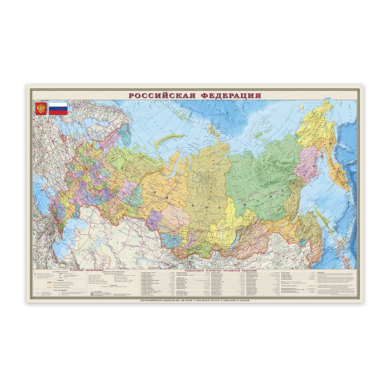

In [140]:
# verify correct downloads

import PIL.Image
import matplotlib.pyplot as plt
from pathlib import Path

# Sample a single row
sample_row = merged_df.sample(1).iloc[0]

# Construct the image path
img_path = Path(DATA_PATH) / DATASET_NAME / sample_row['image_name']

# Print the image name
print("SKU:", sample_row['sku'])
print("URL:", sample_row['url'])
print("Image name:", sample_row['image_name'])
print("Name:", sample_row['name'])

# Load and display the image
img = PIL.Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [141]:
# identify sku with no images 

erroneous_indices = merged_df[merged_df.image_name.isna()].index
print("Erroneous indices:")
print(erroneous_indices)

Erroneous indices:
Index([855, 862, 1826], dtype='int64')


In [142]:
# # Read file instead of downloading images
# target_df = pd.read_csv(target_file_path)

In [144]:
merged_df.columns.tolist()

['sku',
 'description',
 'image_url',
 'name',
 'category',
 'схема',
 'brand',
 'niche',
 'seller',
 'balance_fbo',
 'balance_fbs',
 'warehouses_count',
 'comments',
 'final_price',
 'max_price',
 'min_price',
 'average_price',
 'median_price',
 'membership_card_price',
 'sales',
 'revenue',
 'revenue_potential',
 'revenue_average',
 'lost_profit',
 'lost_profit_percent',
 'url',
 'thumb',
 'pics_count',
 'has_video',
 'first_date',
 'days_in_website',
 'days_in_stock',
 'days_with_sales',
 'average_if_in_stock',
 'rating',
 'fbs',
 'base_price',
 'category_position',
 'categories_last_count',
 'sales_per_day_average',
 'sales',
 'frozen_stocks',
 'frozen_stocks_cost',
 'frozen_stocks_percent',
 'balance',
 'image_name']

In [146]:
# drop sku with no images and save

target_file_path = (
    Path(DATA_PATH) /
    Path('tables_OZ_geo_5500') /
    Path('processed') / 
    Path('OZ_geo_5500.csv')
)

merged_df.drop(erroneous_indices).to_csv(
    target_file_path, index=None
)

# Make full pairwise dataset for query sku

In [10]:
# 1. Extract query and non-query parts
QUERY_SELLER = 'ИНТЕРТРЕЙД'

query_df = merged_df[merged_df['seller'] == QUERY_SELLER].copy()
non_query_df = merged_df[merged_df['seller'] != QUERY_SELLER].copy()

# 2. Add suffixes for merging
query_df = query_df.add_suffix('_first')
non_query_df = non_query_df.add_suffix('_second')

# 3. Create Cartesian product using merge with `how='cross'`
pairwise_query_df = query_df.merge(non_query_df, how='cross')
pairwise_query_df.shape

(127466, 90)

In [ ]:
pairwise_query_df.sku_first.nunique(),\
pairwise_query_df.sku_second.nunique()

(23, 5542)

In [16]:
# drop sku with no images and save

pairwise_file_name = (
    'OZ_geo_5500_pairwise-subset'
    f'_query-seller={QUERY_SELLER}'
    '.csv'
)

pairwise_file_path = (
    Path(DATA_PATH) /
    Path('tables_OZ_geo_5500') /
    Path('processed') / 
    Path(pairwise_file_name)
)

pairwise_query_df.to_csv(pairwise_file_path)